#**Introduction**

### With the use of datasets, this project seeks to develop a machine learning model for analyzing and projecting freelancer earnings. Examining the variables affecting revenue in the freelance market is made possible by this dataset.

### I'll move forward with a thorough pretreatment and data cleaning phase, taking care of any outliers, missing values, or discrepancies that can compromise the analysis's integrity. This important stage will guarantee that the modeling and analysis that follow are founded on correct and trustworthy data.

### In order to find patterns, correlations, and trends in the freelancer earnings data, I will perform a comprehensive exploratory data analysis using statistical techniques and visualizations. The main elements influencing income variation in the freelance market will be clarified by this investigation.


### In order to precisely forecast freelancer earnings based on pertinent variables, I will next create and train a variety of machine learning regression models. The top-performing model will be chosen when these models have been thoroughly assessed using the proper performance indicators. This research offers a deeper understanding of the earning potential and influencing elements within the dynamic and changing freelance industry, in addition to showcasing the practical implementation of machine learning techniques. By examining this dataset, I hope to provide useful information that organizations and independent contractors can use to understand the earning potential and determining factors in this ever-changing industry.

#**Dataset Features**


---


### This extensive dataset monitors work trends and freelancer incomes across a variety of platforms, job types, and experience levels. It helps organizations, researchers, and freelancers understand the dynamics of the gig economy by offering insightful information about client preferences, compensation trends, and success measures in the worldwide freelancing sector.

| Column Name | Description | Data Type | Example Values |
|---|---|---|---|
| Freelancer_ID | Unique identifier for each freelancer record | integer | 1, 2, 3 |
| Job_Category | Primary classification of freelance work performed | string | Web Development, Data Entry, Content Writing |
| Platform | Freelance marketplace where work was performed | string | Fiverr, Upwork, Toptal, Freelancer, PeoplePerHour |
| Experience_Level | Freelancer's professional experience tier | string | Beginner, Intermediate, Expert |
| Client_Region | Geographical location of the client | string | Asia, Europe, USA, Canada, UK, Australia, Middle East |
| Payment_Method | Method used for financial transactions | string | Bank Transfer, PayPal, Mobile Banking, Crypto |
| Job_Completed | Number of projects successfully completed | integer | 180, 218, 27 |
| Earnings_USD | Total earnings in US Dollars | float | 1620, 9078, 3455 |
| Hourly_Rate | Freelancer's hourly compensation rate in USD | float | 95.79, 86.38, 85.17 |
| Job_Success_Rate | Percentage of successful job completions | float | 68.73, 97.54, 86.6 |
| Client_Rating | Average rating given by clients (1.0-5.0 scale) | float | 3.18, 3.44, 4.2 |
| Job_Duration_Days | Average project timeline in days | integer | 1, 54, 46 |
| Project_Type | Classification of work arrangement | string | Fixed, Hourly |
| Rehire_Rate | Percentage of clients who rehire the freelancer | float | 40.19, 36.53, 74.05 |
| Marketing_Spend | Amount invested in platform promotion in USD | integer | 53, 486, 489 |

#**Libraries**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#**1.Data Collection**

In [70]:
raw_csv = 'https://raw.githubusercontent.com/hanii373/Machine-Learning-Model-Development/refs/heads/main/freelancer_earnings_bd.csv'

df = pd.read_csv(raw_csv)
df.head(5)

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


# **2.Data Cleaning**

In [71]:
print("Missing Values per Column:")
print(df.isnull().sum())

print("\nDataFrame Info:")
df.info()

Missing Values per Column:
Freelancer_ID        0
Job_Category         0
Platform             0
Experience_Level     0
Client_Region        0
Payment_Method       0
Job_Completed        0
Earnings_USD         0
Hourly_Rate          0
Job_Success_Rate     0
Client_Rating        0
Job_Duration_Days    0
Project_Type         0
Rehire_Rate          0
Marketing_Spend      0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Freelancer_ID      1950 non-null   int64  
 1   Job_Category       1950 non-null   object 
 2   Platform           1950 non-null   object 
 3   Experience_Level   1950 non-null   object 
 4   Client_Region      1950 non-null   object 
 5   Payment_Method     1950 non-null   object 
 6   Job_Completed      1950 non-null   int64  
 7   Earnings_USD       1950 non-null   int64  
 8   Hourly

In [72]:
df['Project_Type'] = df['Project_Type'].replace({'Fixed': 1, 'Hourly': 0})
df.head()

<ipython-input-72-edd8af43ce21>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Project_Type'] = df['Project_Type'].replace({'Fixed': 1, 'Hourly': 0})


,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,1,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,1,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,0,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,0,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,0,69.09,489


#**3.Data Preprocessing**

In [7]:
print(f"Job categories: {df['Job_Category'].nunique()}")

Job categories: 8


In [8]:
# Checking for unique values
print(df['Job_Category'].unique())


['Web Development' 'App Development' 'Data Entry' 'Digital Marketing'
 'Customer Support' 'Content Writing' 'Graphic Design' 'SEO']


In [9]:
df[['Job_Category', 'Job_Completed','Earnings_USD']]

,Job_Category,Job_Completed,Earnings_USD
0,Web Development,180,1620
1,App Development,218,9078
2,Web Development,27,3455
3,Data Entry,17,5577
4,Digital Marketing,245,5898
...,...,...,...
1945,Graphic Design,143,6823
1946,SEO,164,7942
1947,SEO,236,9838
1948,SEO,152,4492


In [10]:
job_category_stats = df.groupby('Job_Category').agg({'Job_Completed': 'sum', 'Earnings_USD': 'sum'})
job_category_stats


,Job_Completed,Earnings_USD
Job_Category,,
App Development,36814,1289959
Content Writing,33748,1133991
Customer Support,36739,1253071
Data Entry,36077,1209294
Digital Marketing,36357,1176775
Graphic Design,39091,1361271
SEO,36097,1108528
Web Development,39262,1251366


In [11]:
# Assuming 'Job_Duration_Days' represents the time taken for a job
df['Earnings_Per_Day'] = df['Earnings_USD'] / df['Job_Duration_Days']
df['Earnings_Per_Day']

,Earnings_Per_Day
0,1620.000000
1,168.111111
2,75.108696
3,136.024390
4,143.853659
...,...
1945,524.846154
1946,233.588235
1947,258.894737
1948,64.171429


In [12]:
print(f"Platforms represented: {df['Platform'].nunique()}")

Platforms represented: 5


In [13]:
#print only a platform and the earning amoumt
df[['Platform', 'Earnings_USD']]

,Platform,Earnings_USD
0,Fiverr,1620
1,Fiverr,9078
2,Fiverr,3455
3,PeoplePerHour,5577
4,Upwork,5898
...,...,...
1945,Fiverr,6823
1946,Upwork,7942
1947,PeoplePerHour,9838
1948,Freelancer,4492


In [14]:
#Sum of product price of each brand
platform_usd = df.groupby('Platform')['Earnings_USD'].sum().reset_index()
platform_usd['Earnings_USD'] = platform_usd['Earnings_USD'].astype(str) + '$'
platform_usd

,Platform,Earnings_USD
0,Fiverr,1981479$
1,Freelancer,1945159$
2,PeoplePerHour,1801020$
3,Toptal,1944435$
4,Upwork,2112162$


In [15]:
df[['Client_Region', 'Earnings_USD', 'Client_Rating']]

,Client_Region,Earnings_USD,Client_Rating
0,Asia,1620,3.18
1,Australia,9078,3.44
2,UK,3455,4.20
3,Asia,5577,4.47
4,Asia,5898,5.00
...,...,...,...
1945,USA,6823,4.65
1946,Middle East,7942,3.29
1947,UK,9838,4.67
1948,Europe,4492,4.08


In [16]:
client_region_stats = df.groupby('Client_Region').agg({'Earnings_USD': 'sum', 'Client_Rating': 'mean'})
client_region_stats

,Earnings_USD,Client_Rating
Client_Region,,
Asia,1453412,3.960854
Australia,1479897,3.973356
Canada,1316133,3.997967
Europe,1281319,3.976221
Middle East,1417408,4.045567
UK,1413185,3.956536
USA,1422901,4.056747


In [17]:
df[['Platform', 'Client_Region']]

,Platform,Client_Region
0,Fiverr,Asia
1,Fiverr,Australia
2,Fiverr,UK
3,PeoplePerHour,Asia
4,Upwork,Asia
...,...,...
1945,Fiverr,USA
1946,Upwork,Middle East
1947,PeoplePerHour,UK
1948,Freelancer,Europe


In [18]:
# Group data by 'Platform' and 'Client_Region', then count occurrences
platform_region_counts = df.groupby(['Platform', 'Client_Region']).size().unstack(fill_value=0)

platform_region_counts

Client_Region,Asia,Australia,Canada,Europe,Middle East,UK,USA
Platform,,,,,,,
Fiverr,57,59,45,51,61,51,67
Freelancer,58,58,48,46,64,58,54
PeoplePerHour,50,55,46,54,52,44,57
Toptal,46,55,53,54,55,74,58
Upwork,70,71,54,57,59,53,56


# **4.Data Analysis & Visualization**




---


### I carry out a number of statistical studies during the data analysis phase in order to comprehend the features of the product data. For numerical features like ratings and pricing, descriptive statistics like mean, standard deviation, minimum, maximum, count, mode, and median are computed. To investigate the distribution of these variables, visualizations such as boxplots, histograms, and Kernel Density Estimate (KDE) plots are made. To learn more about the distributions' shape, I also compute skewness and kurtosis.



## ***Visualization***

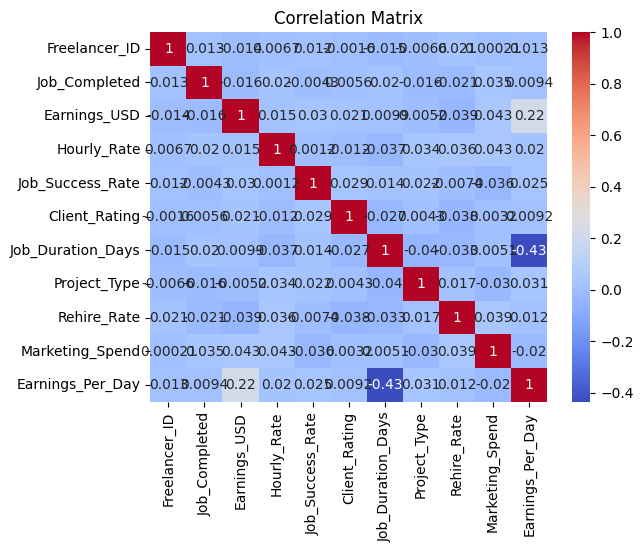

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

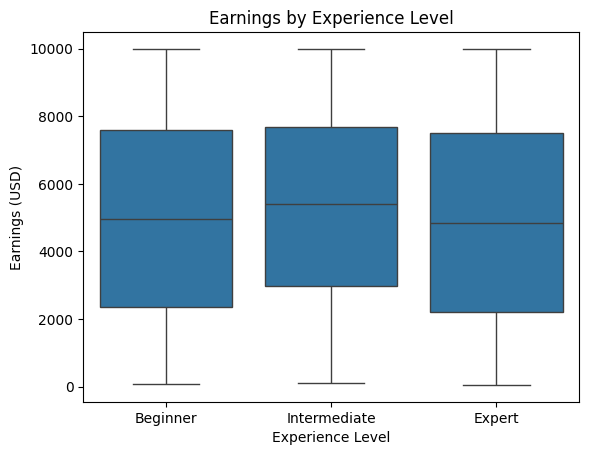

In [ ]:
sns.boxplot(x='Experience_Level', y='Earnings_USD', data=df)
plt.title('Earnings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Earnings (USD)')
plt.show()

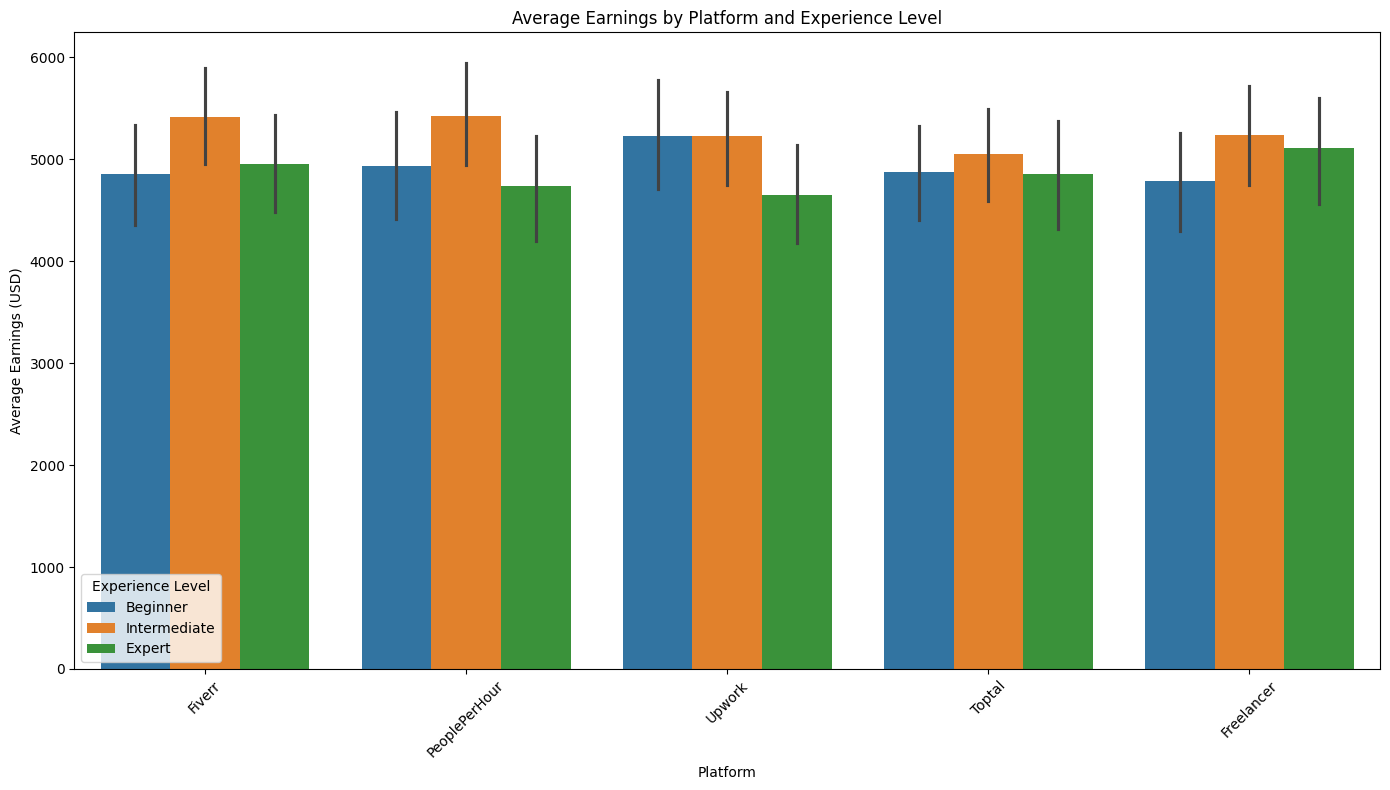

In [ ]:
# Assuming you want to analyze 'Earnings_USD'
plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y='Earnings_USD', hue='Experience_Level', data=df)  # Changed 'Hourly_Rate' to 'Earnings_USD'
plt.title('Average Earnings by Platform and Experience Level')  # Changed title accordingly
plt.xlabel('Platform')
plt.ylabel('Average Earnings (USD)')  # Changed y-axis label
plt.xticks(rotation=45)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

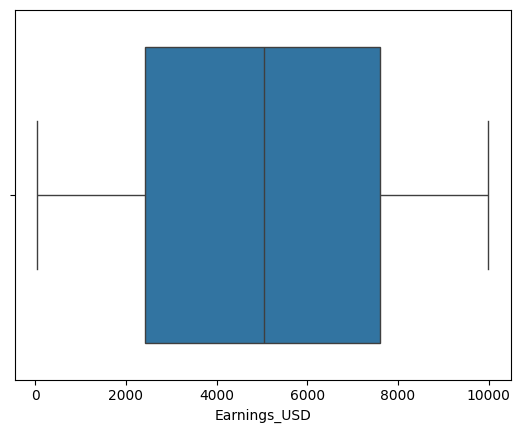

In [ ]:
# Box plot for 'Earnings_USD'
sns.boxplot(x=df['Earnings_USD'])
plt.show()

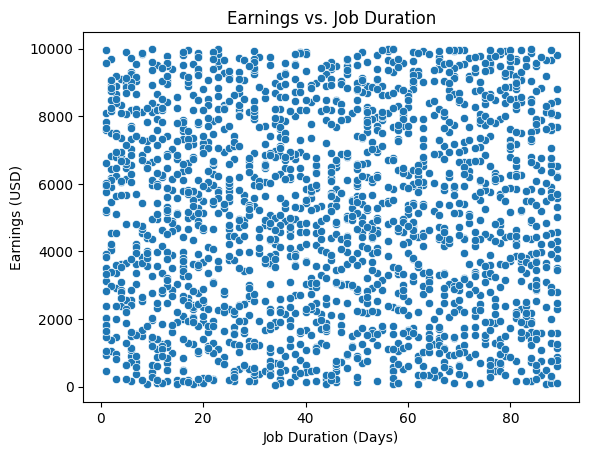

In [ ]:
sns.scatterplot(x='Job_Duration_Days', y='Earnings_USD', data=df)
plt.title('Earnings vs. Job Duration')
plt.xlabel('Job Duration (Days)')
plt.ylabel('Earnings (USD)')
plt.show()

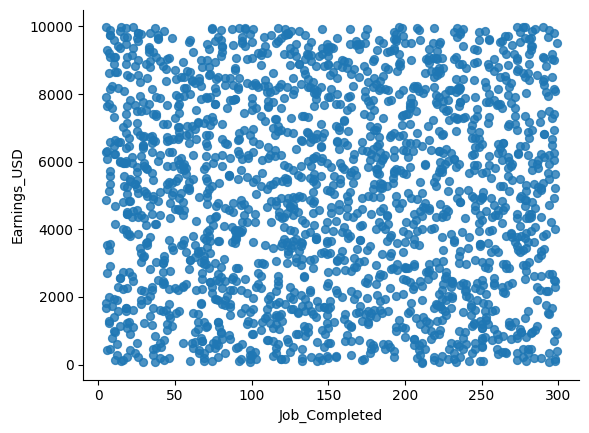

In [ ]:
df.plot(kind='scatter', x='Job_Completed', y='Earnings_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

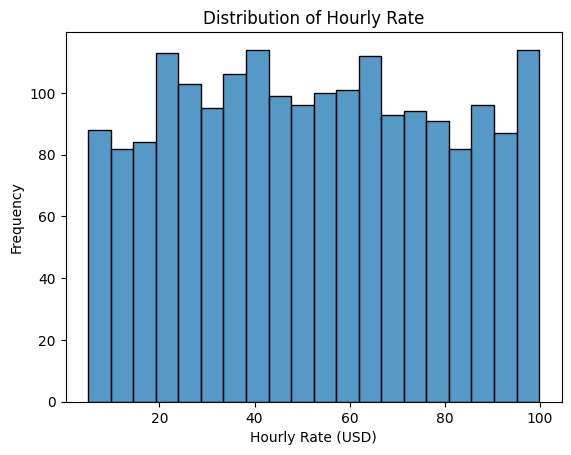

In [ ]:
sns.histplot(df['Hourly_Rate'], bins=20)
plt.title('Distribution of Hourly Rate')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-b6e453408a76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Job_Completed', y='Job_Category', inner='box', palette='Dark2')


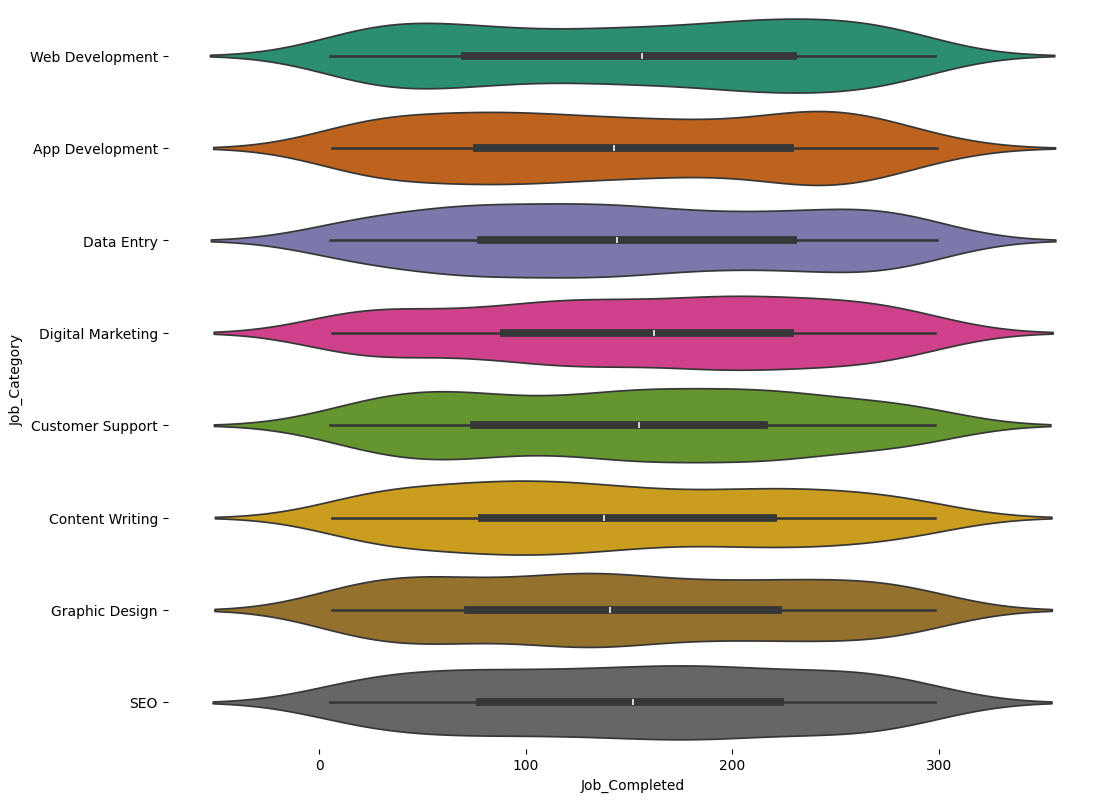

In [ ]:
figsize = (12, 1.2 * len(df['Job_Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Job_Completed', y='Job_Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

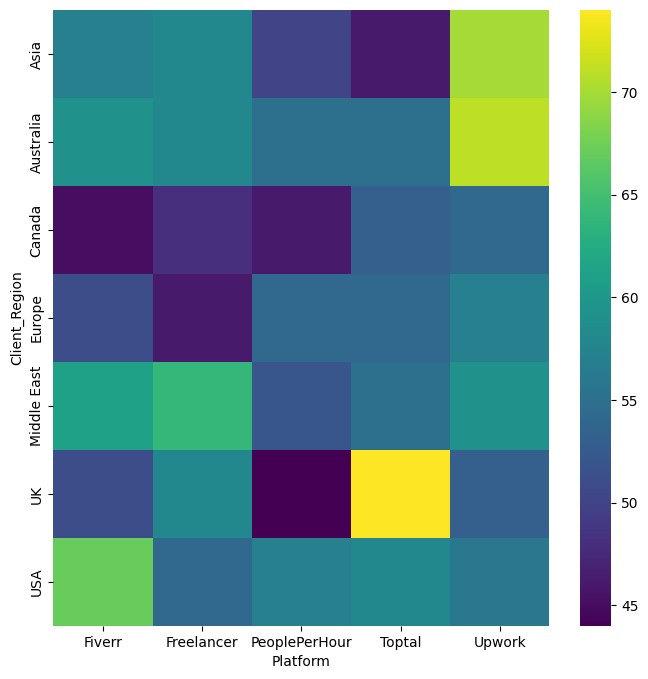

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Client_Region'].value_counts()
    for x_label, grp in df.groupby('Platform')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Platform')
_ = plt.ylabel('Client_Region')

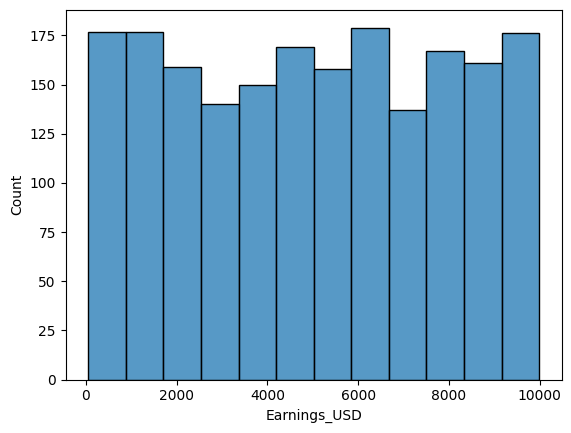

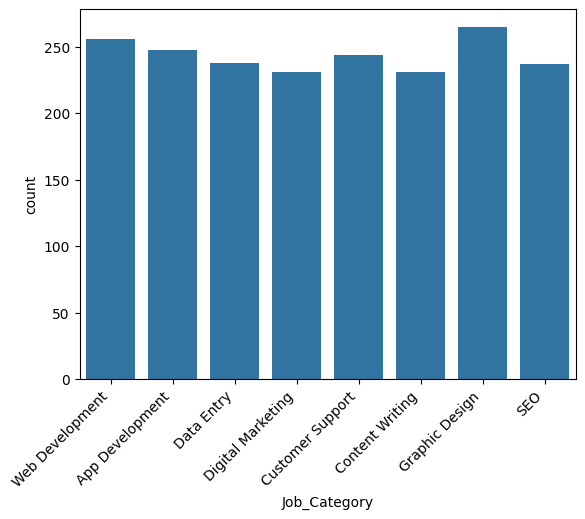

In [ ]:
sns.histplot(df['Earnings_USD'])
plt.show()

sns.countplot(x='Job_Category', data=df)
plt.xticks(rotation=45, ha='right') #rotate x axis labels.
plt.show()

In [ ]:
sns.scatterplot(x='Job_Duration_Days', y='Earnings_USD', data=df)
plt.show()

sns.boxplot(x='Experience_Level', y='Earnings_USD', data=df)
plt.show()

sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

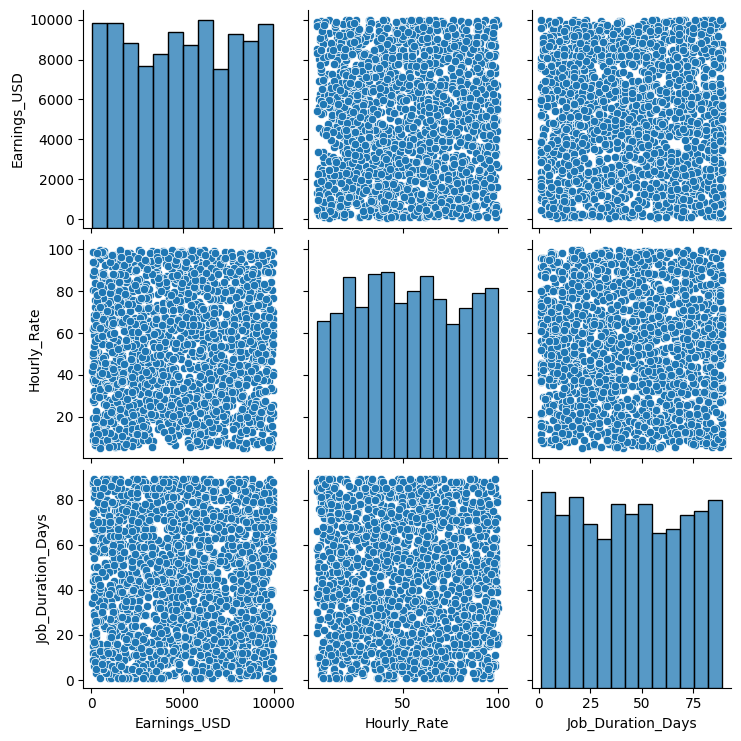

In [ ]:
sns.pairplot(df[['Earnings_USD', 'Hourly_Rate', 'Job_Duration_Days']])
plt.show()

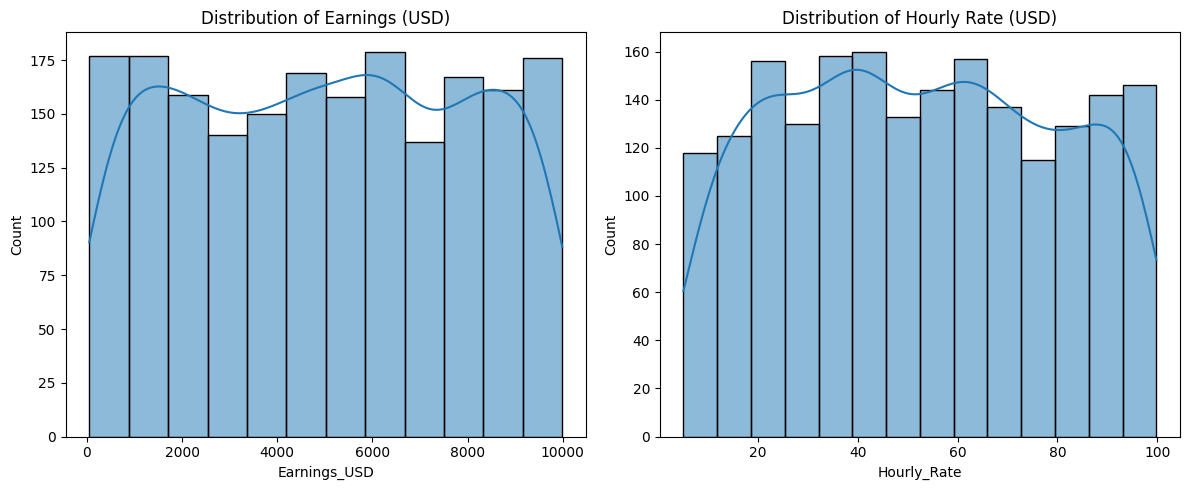

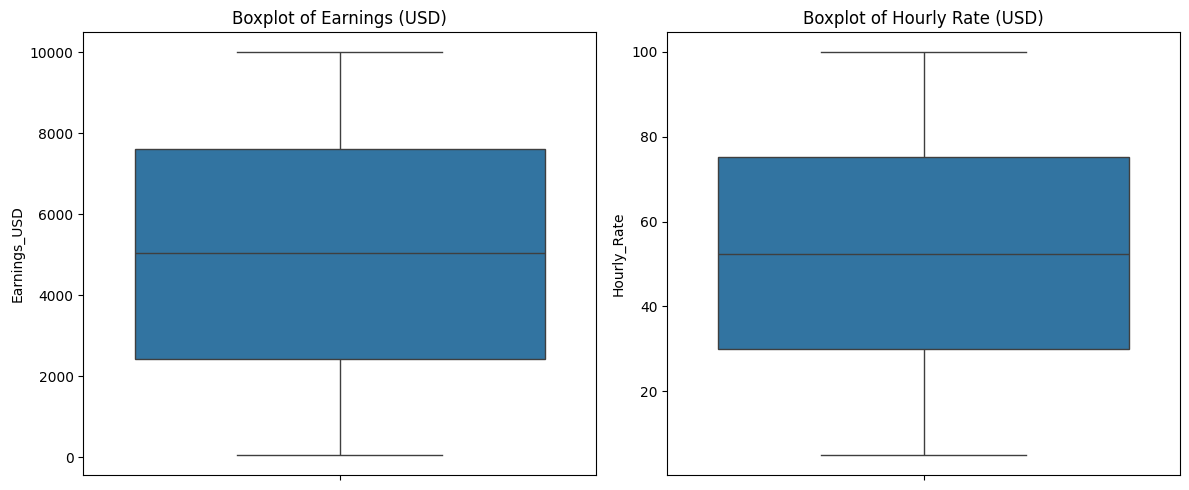

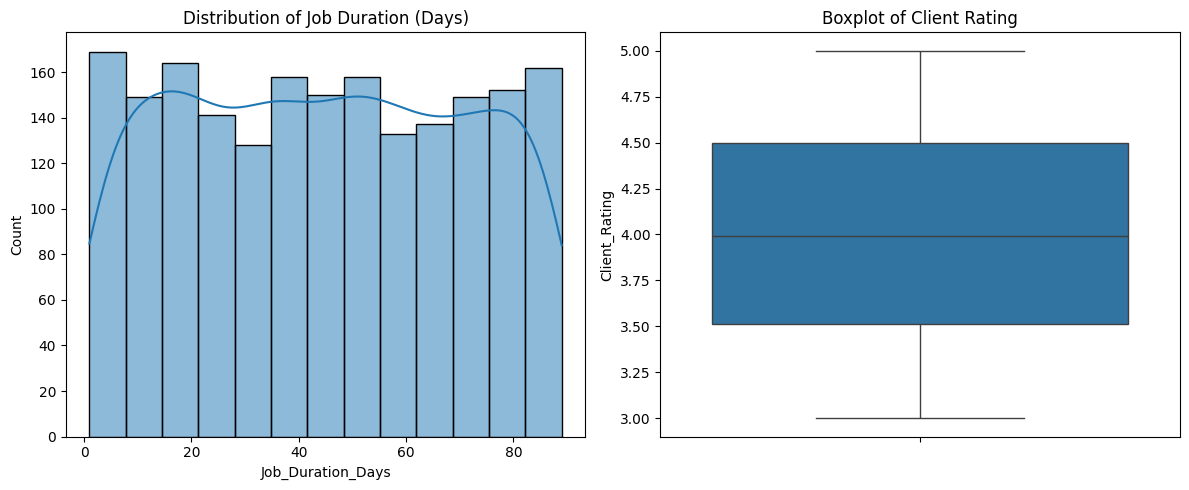

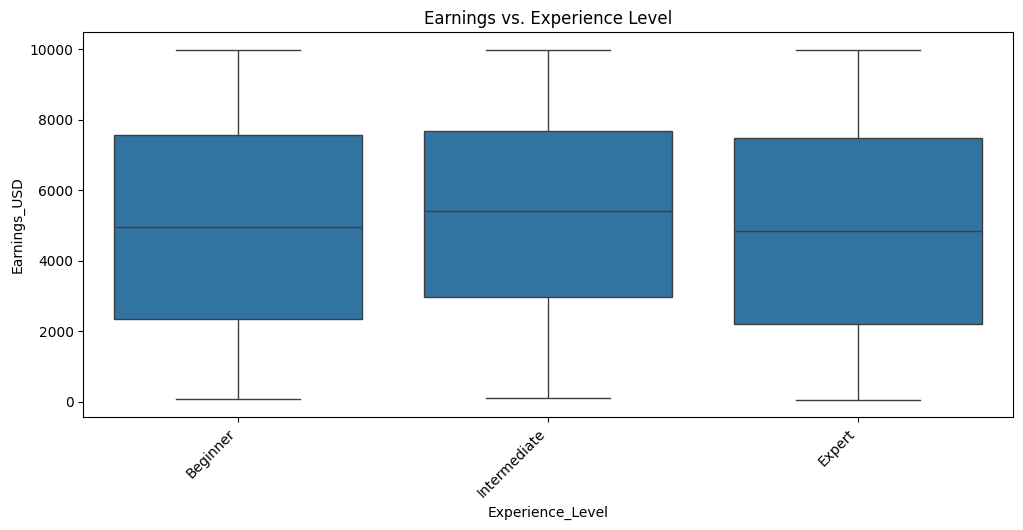

In [ ]:
# Visualizations - Earnings and Hourly Rate Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Earnings_USD'], kde=True)
plt.title('Distribution of Earnings (USD)')

plt.subplot(1, 2, 2)
sns.histplot(df['Hourly_Rate'], kde=True)
plt.title('Distribution of Hourly Rate (USD)')

plt.tight_layout()
plt.show()

# Boxplots - Earnings and Hourly Rate
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Earnings_USD'])
plt.title('Boxplot of Earnings (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Hourly_Rate'])
plt.title('Boxplot of Hourly Rate (USD)')

plt.tight_layout()
plt.show()

# Visualizations - Job Duration and Client Rating
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Job_Duration_Days'], kde=True)
plt.title('Distribution of Job Duration (Days)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Client_Rating'])
plt.title('Boxplot of Client Rating')

plt.tight_layout()
plt.show()

# Box plots - Earnings vs Experience Level
plt.figure(figsize=(12, 5))
sns.boxplot(x='Experience_Level', y='Earnings_USD', data=df)
plt.title('Earnings vs. Experience Level')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-30-b3290e1c8b38>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Client_Rating'], shade=True, color='darkgreen')
<ipython-input-30-b3290e1c8b38>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Earnings_USD'], shade=True, color='purple')


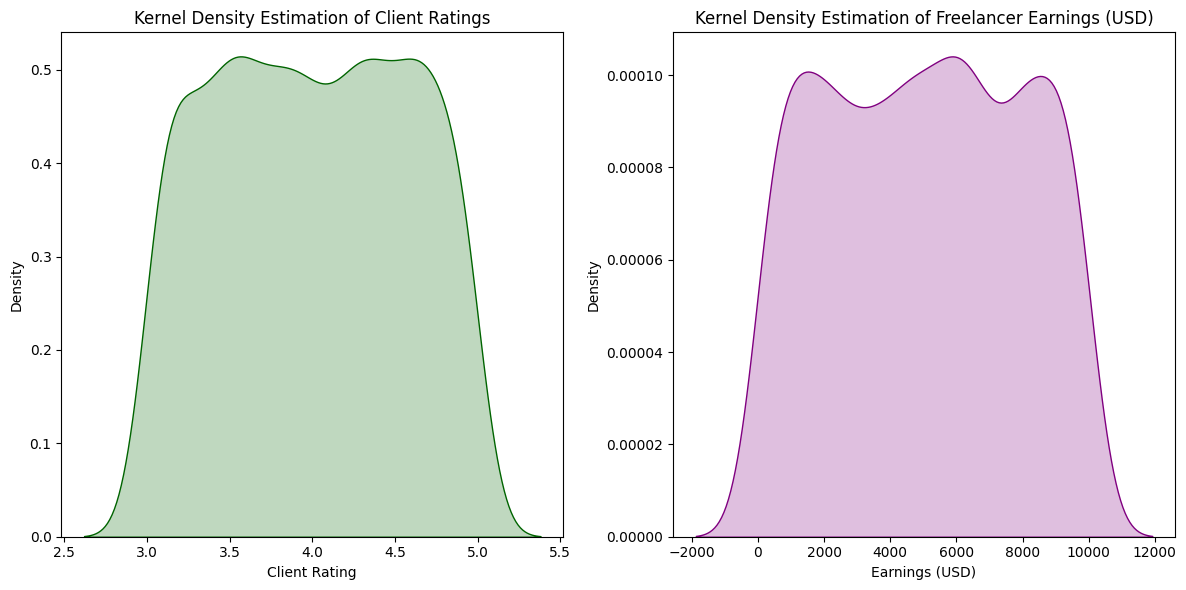

<ipython-input-30-b3290e1c8b38>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Hourly_Rate'], shade=True, color='blue')


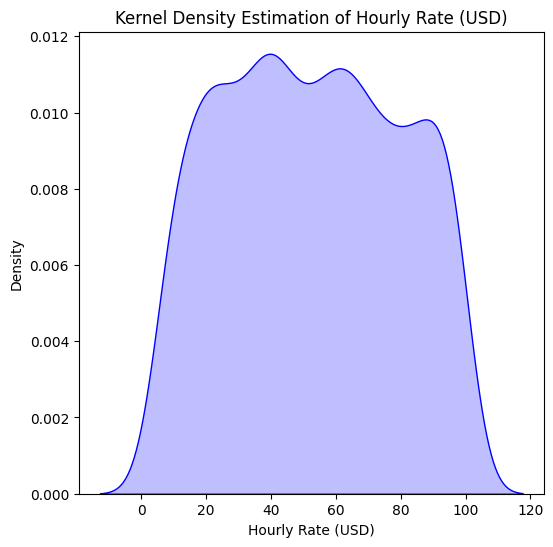

<ipython-input-30-b3290e1c8b38>:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Job_Duration_Days'], shade=True, color='red')


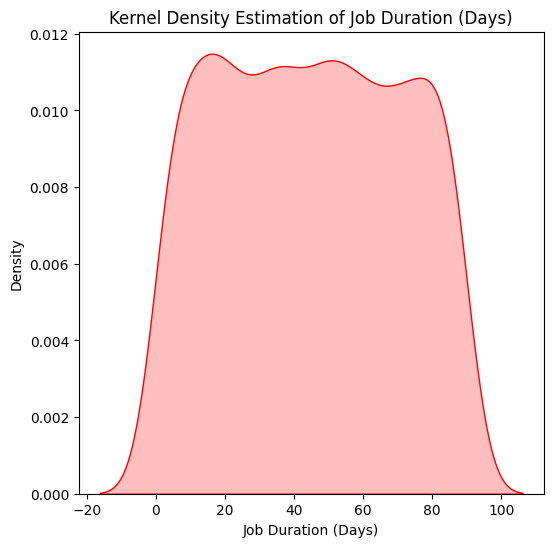

In [ ]:
# Kernel Density Estimate Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df['Client_Rating'], shade=True, color='darkgreen')
plt.title('Kernel Density Estimation of Client Ratings')
plt.xlabel('Client Rating')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Earnings_USD'], shade=True, color='purple')
plt.title('Kernel Density Estimation of Freelancer Earnings (USD)')
plt.xlabel('Earnings (USD)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Optional: Kernel Density Estimate of Hourly Rate
plt.figure(figsize=(6, 6))
sns.kdeplot(df['Hourly_Rate'], shade=True, color='blue')
plt.title('Kernel Density Estimation of Hourly Rate (USD)')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Density')
plt.show()

# Optional: Kernel Density Estimate of Job Duration
plt.figure(figsize=(6, 6))
sns.kdeplot(df['Job_Duration_Days'], shade=True, color='red')
plt.title('Kernel Density Estimation of Job Duration (Days)')
plt.xlabel('Job Duration (Days)')
plt.ylabel('Density')
plt.show()

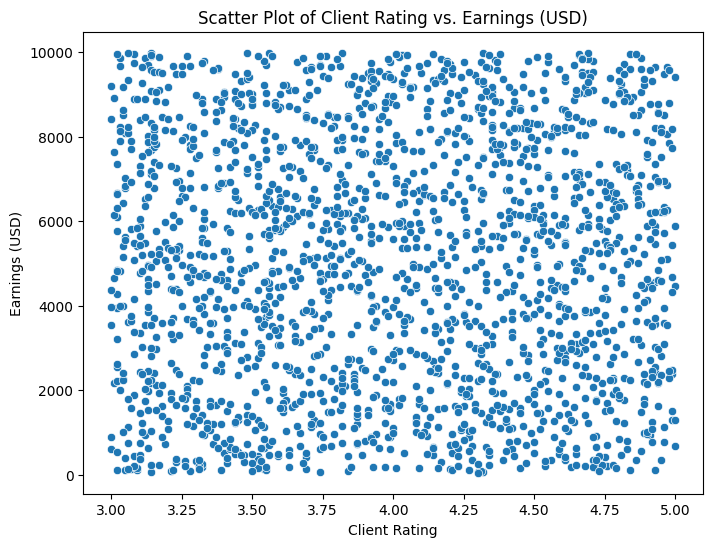

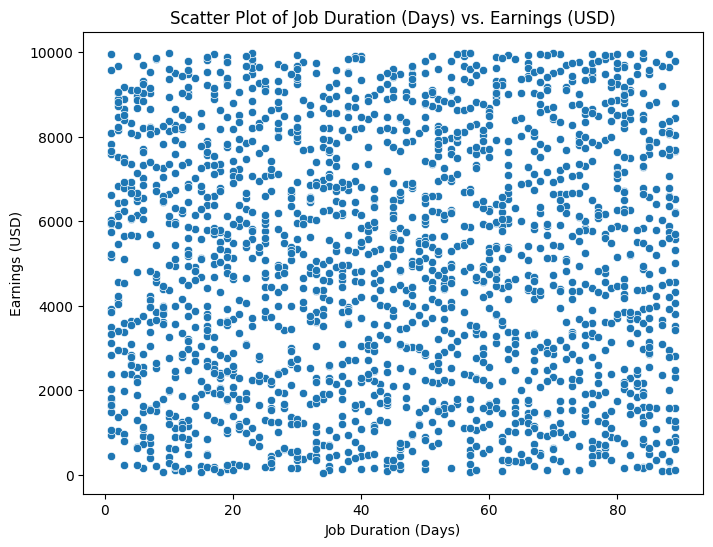

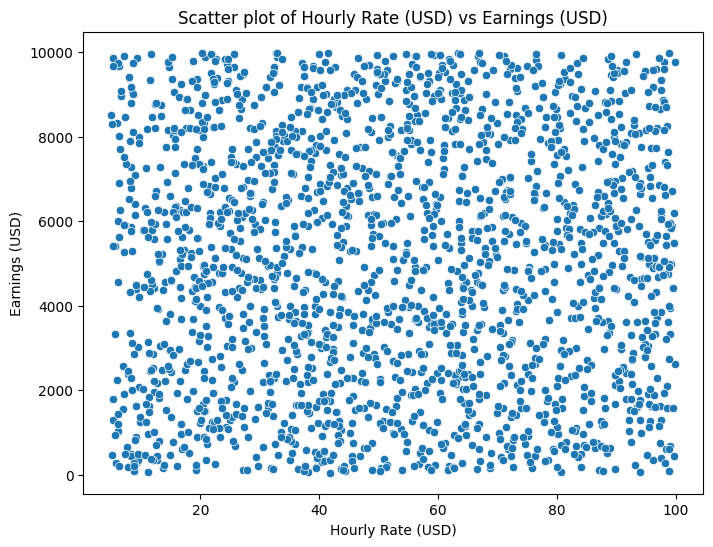

In [ ]:
# Scatter Plot - Client Rating vs. Earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Client_Rating', y='Earnings_USD', data=df)
plt.title('Scatter Plot of Client Rating vs. Earnings (USD)')
plt.xlabel('Client Rating')
plt.ylabel('Earnings (USD)')
plt.show()

# Optional: Scatter Plot - Job Duration vs. Earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Job_Duration_Days', y='Earnings_USD', data=df)
plt.title('Scatter Plot of Job Duration (Days) vs. Earnings (USD)')
plt.xlabel('Job Duration (Days)')
plt.ylabel('Earnings (USD)')
plt.show()

# Optional: Scatter plot - Hourly rate vs Earnings.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hourly_Rate', y='Earnings_USD', data=df)
plt.title('Scatter plot of Hourly Rate (USD) vs Earnings (USD)')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Earnings (USD)')
plt.show()

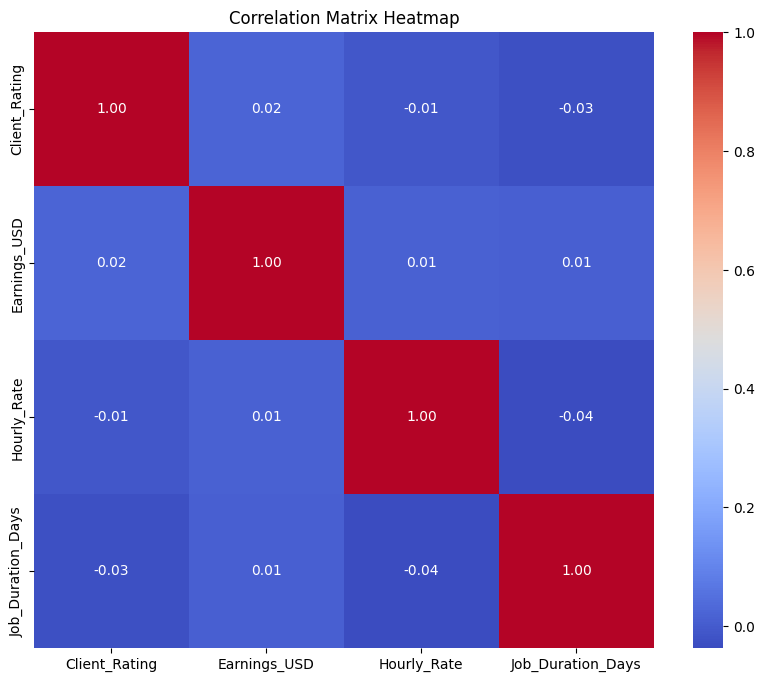

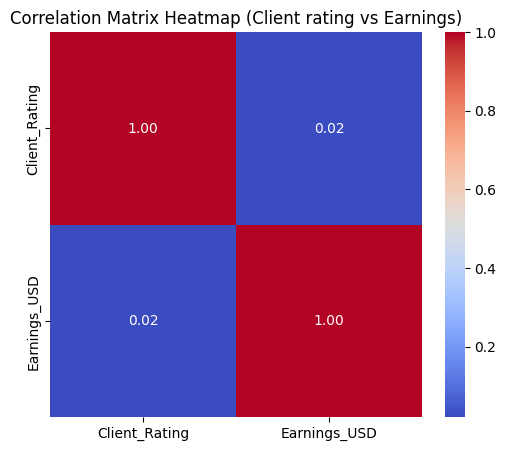

In [ ]:
# Correlation Matrix Heatmap
correlation_matrix = df[['Client_Rating', 'Earnings_USD', 'Hourly_Rate', 'Job_Duration_Days']].corr()  # Include relevant columns
plt.figure(figsize=(10, 8)) #Adjusted figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#Optional: Smaller correlation matrix.
correlation_matrix_small = df[['Client_Rating', 'Earnings_USD']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix_small, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Client rating vs Earnings)')
plt.show()

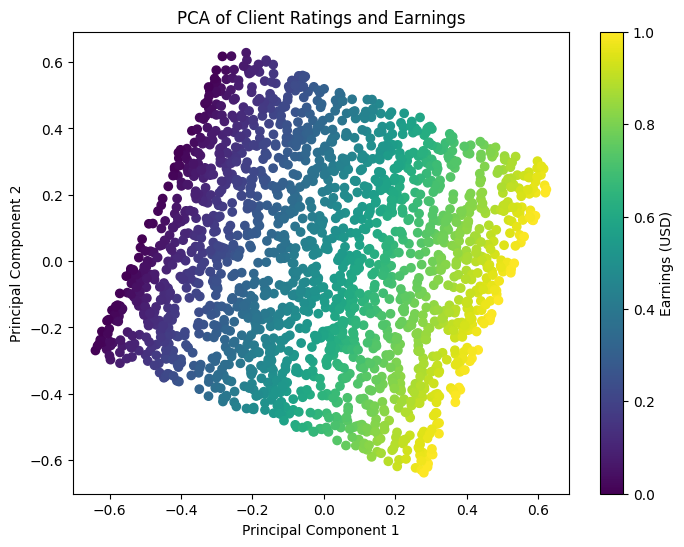

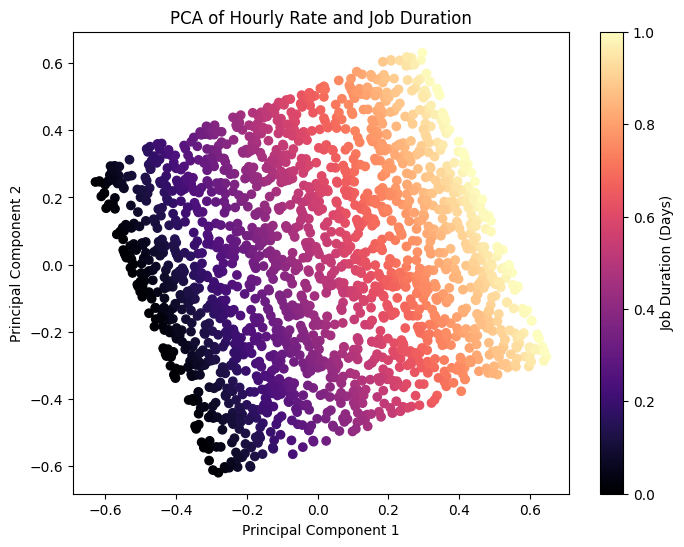

In [ ]:

# MinMaxScaler
scaler = MinMaxScaler()
df[['Client_Rating', 'Earnings_USD']] = scaler.fit_transform(df[['Client_Rating', 'Earnings_USD']])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Client_Rating', 'Earnings_USD']])

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Earnings_USD'], cmap='viridis')
plt.colorbar(label='Earnings (USD)')
plt.title('PCA of Client Ratings and Earnings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: PCA on other columns
scaler2 = MinMaxScaler()
df[['Hourly_Rate', 'Job_Duration_Days']] = scaler2.fit_transform(df[['Hourly_Rate', 'Job_Duration_Days']])

pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(df[['Hourly_Rate', 'Job_Duration_Days']])

df_pca_2 = pd.DataFrame(data=pca_result_2, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'], c=df['Job_Duration_Days'], cmap='magma')
plt.colorbar(label = 'Job Duration (Days)')
plt.title('PCA of Hourly Rate and Job Duration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## ***Analysis***

In [ ]:
summary_stats = df[['Job_Success_Rate', 'Client_Rating', 'Rehire_Rate']].agg(['mean', 'median', 'min', 'max'])
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Job_Success_Rate,Client_Rating,Rehire_Rate
mean,74.951846,0.497946,44.556913
median,75.400000,0.495000,43.920000
min,50.160000,0.000000,10.000000
max,99.990000,1.000000,79.950000


In [ ]:
# Calculate skewness and kurtosis
skewness_rating = skew(df['Client_Rating'])
skewness_price = skew(df['Earnings_USD'])
kurtosis_rating = kurtosis(df['Client_Rating'])
kurtosis_price = kurtosis(df['Earnings_USD'])

print(f"Skewness of Client Ratings: {skewness_rating}")
print(f"Skewness of Earnings (USD): {skewness_price}")
print(f"Kurtosis of Client Ratings: {kurtosis_rating}")
print(f"Kurtosis of Earnings (USD): {kurtosis_price}")

#Optional: skewness and kurtosis of hourly rate.
skewness_hourly_rate = skew(df['Hourly_Rate'])
kurtosis_hourly_rate = kurtosis(df['Hourly_Rate'])

print(f"Skewness of Hourly Rate (USD): {skewness_hourly_rate}")
print(f"Kurtosis of Hourly Rate (USD): {kurtosis_hourly_rate}")

#Optional: skewness and kurtosis of Job duration.
skewness_job_duration = skew(df['Job_Duration_Days'])
kurtosis_job_duration = kurtosis(df['Job_Duration_Days'])

print(f"Skewness of Job Duration (Days): {skewness_job_duration}")
print(f"Kurtosis of Job Duration (Days): {kurtosis_job_duration}")

Skewness of Client Ratings: -0.005305552705665492
Skewness of Earnings (USD): -0.0075731041206576945
Kurtosis of Client Ratings: -1.198207604879687
Kurtosis of Earnings (USD): -1.2105814135851072
Skewness of Hourly Rate (USD): 0.03894486508031455
Kurtosis of Hourly Rate (USD): -1.1513479000175086
Skewness of Job Duration (Days): 0.019122064498255292
Kurtosis of Job Duration (Days): -1.204367494867565


### **Hypothesis Testing**

* Using t-tests to compare the means of two groups (e.g., compare earnings between two experience levels).
* Using ANOVA to compare the means of multiple groups.
* Use chi-squared tests to test for relationships between categorical variables.

In [ ]:
experience_levels = df['Experience_Level'].unique()
if len(experience_levels) >= 2:
  level1 = df[df['Experience_Level'] == experience_levels[0]]['Earnings_USD']
  level2 = df[df['Experience_Level'] == experience_levels[1]]['Earnings_USD']
  t_stat, p_value = stats.ttest_ind(level1, level2)
  print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.0885788692113625, P-value: 0.03693875606202106


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Job_Category'], df['Platform'])

# Perform chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant relationship between Job_Category and Platform.")
else:
    print("There is no statistically significant relationship between Job_Category and Platform.")

Chi-squared: 25.94689897990883, P-value: 0.5759634930836912
There is no statistically significant relationship between Job_Category and Platform.


In [ ]:
# Group earnings by experience level
groups = []
for level in df['Experience_Level'].unique():
    groups.append(df[df['Experience_Level'] == level]['Earnings_USD'])

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There are statistically significant differences in earnings across experience levels.")
else:
    print("There are no statistically significant differences in earnings across experience levels.")

F-statistic: 3.6136460737318377, P-value: 0.027134327046822337
There are statistically significant differences in earnings across experience levels.


#**5.ML Model Training**

**Load and Preprocess Data**

In [48]:
# Basic preprocessing
# Impute missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Label encode 'Experience_Level'
le = LabelEncoder()
df['Experience_Level'] = le.fit_transform(df['Experience_Level'])

# One-hot encode 'Project_Type' and 'Job_Category'
# Define categorical_features before any transformations
categorical_features = ['Job_Category', 'Platform', 'Client_Region', 'Payment_Method']  # Include all your categorical columns

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# One-hot encode categorical features on the copy
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

X = df_encoded.drop('Earnings_USD', axis=1)  # Features
y = df_encoded['Earnings_USD'] # Target

**Split Data into Training and Testing Sets**


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # No stratify, because regression

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (1560, 32), (1560,)
Testing set: (390, 32), (390,)


**Choose and Train a Machine Learning Model (Regression)**

In [50]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
regressor = DecisionTreeRegressor()  # Create a DecisionTreeRegressor object
regressor = regressor.fit(X, y)

In [52]:
y_predict = regressor.predict(X)
y_predict

array([1620., 9078., 3455., ..., 9838., 4492., 9297.])

[Text(0.420936183595379, 0.9761904761904762, 'x[10] <= 76.133\nsquared_error = 0.087\nsamples = 1950\nvalue = 0.5'),
 Text(0.15167058160446206, 0.9285714285714286, 'x[10] <= 33.601\nsquared_error = 0.026\nsamples = 651\nvalue = 0.215'),
 Text(0.2863033825999205, 0.9523809523809523, 'True  '),
 Text(0.07506458832881568, 0.8809523809523809, 'x[10] <= 14.606\nsquared_error = 0.005\nsamples = 306\nvalue = 0.091'),
 Text(0.039078789616346955, 0.8333333333333334, 'x[10] <= 7.997\nsquared_error = 0.001\nsamples = 146\nvalue = 0.039'),
 Text(0.020609622602168472, 0.7857142857142857, 'x[10] <= 4.322\nsquared_error = 0.0\nsamples = 70\nvalue = 0.02'),
 Text(0.011650333611342786, 0.7380952380952381, 'x[10] <= 3.319\nsquared_error = 0.0\nsamples = 33\nvalue = 0.01'),
 Text(0.006411592994161801, 0.6904761904761905, 'x[10] <= 1.849\nsquared_error = 0.0\nsamples = 25\nvalue = 0.007'),
 Text(0.0022935779816513763, 0.6428571428571429, 'x[6] <= 0.733\nsquared_error = 0.0\nsamples = 12\nvalue = 0.004'),


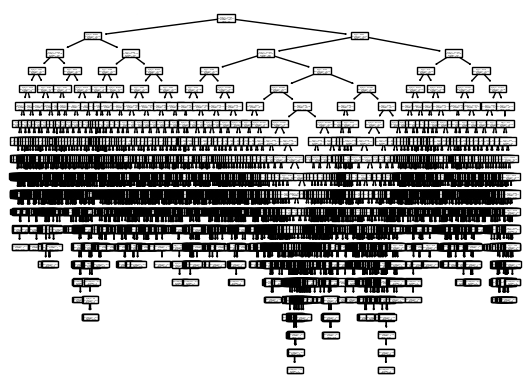

In [ ]:
tree.plot_tree(regressor)

**Optimize Hyperparameters (Grid Search)**

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest parameters found:", best_params)
print("Best negative mean squared error:", best_score)


Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best negative mean squared error: -203610.07023265067


**Evaluate the Model (Regression Metrics)**

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation of the best model on the test set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Evaluation of the best model on the test set:
Mean Squared Error (MSE): 144663.59
R-squared (R2): 0.98



Regression Evaluation Metrics:

Residuals (first 10):
1614    -105.900000
1405      -3.400000
974     -286.690000
1055     360.446667
307    -1298.676667
432     -344.829167
1466      18.230000
598      119.583333
1173     333.960000
305     -479.306667
Name: Earnings_USD, dtype: float64


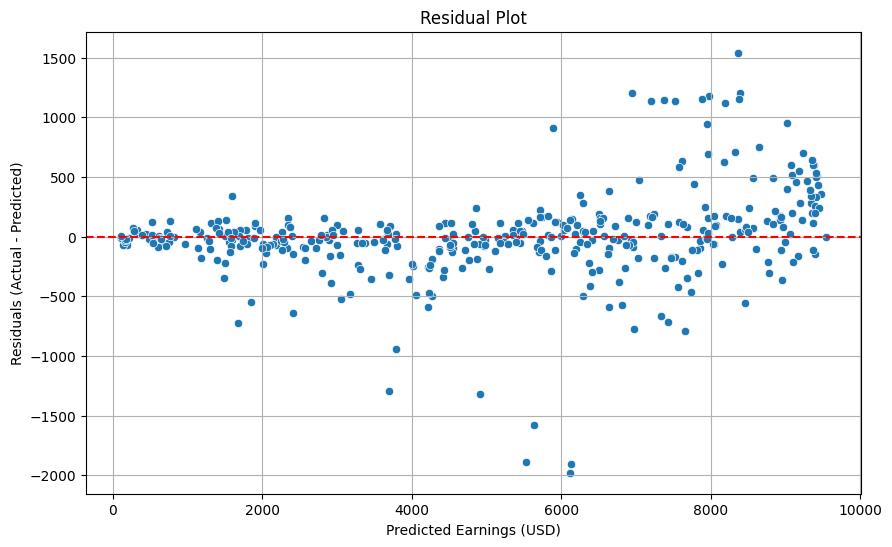

In [27]:
print("\nRegression Evaluation Metrics:")

# Residuals Analysis: Difference between actual and predicted values
residuals = y_test - y_pred
print("\nResiduals (first 10):")
print(residuals[:10])

# Visualization of Residuals (Important for checking assumptions)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Earnings (USD)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()



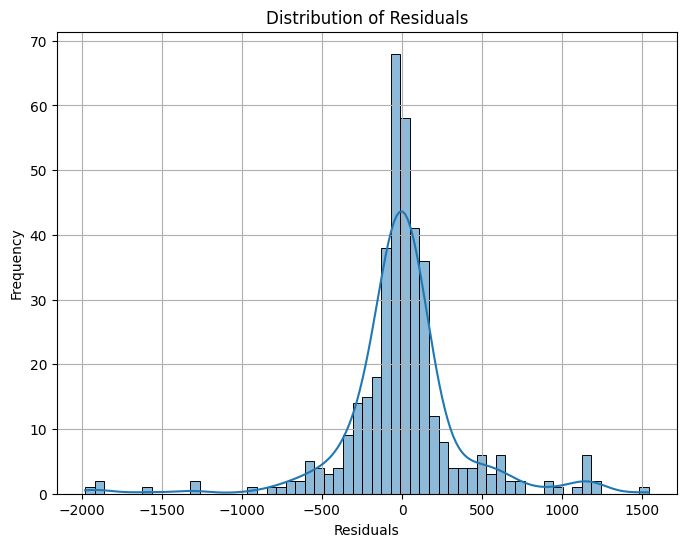


Mean Absolute Error (MAE): 222.63
Mean Squared Log Error (MSLE): 0.01
Root Mean Squared Error (RMSE): 380.35


In [28]:
# Distribution of Residuals (Should ideally be normally distributed)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

# Already calculated MSE and R2
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

from sklearn.metrics import mean_squared_log_error
# MSLE can only be calculated for non-negative targets and predictions
if (y_test >= 0).all() and (y_pred >= 0).all():
    try:
        msle = mean_squared_log_error(y_test, y_pred)
        print(f"Mean Squared Log Error (MSLE): {msle:.2f}")
    except ValueError as e:
        print(f"Mean Squared Log Error (MSLE) cannot be calculated: {e}")
else:
    print("Mean Squared Log Error (MSLE) cannot be calculated as targets or predictions contain negative values.")

import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

### Let's say I want to predict if a freelancer earns "High" or "Low" based on a threshold of $3000

**Create a Classification Target**

In [73]:
df['High_Earner'] = (df['Earnings_USD'] > 3000).astype(int)
y_classification = df['High_Earner']
X_classification = df.drop(['Earnings_USD', 'High_Earner'], axis=1) # Drop both target columns

In [77]:
classifier = RandomForestClassifier(random_state=42)  # Define the classifier
classifier.fit(X_train_class, y_train_class)  # Train the classifier
y_pred_class = classifier.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

# Check if predict_proba returns probabilities for both classes
if classifier.predict_proba(X_test_class).shape[1] == 2:
    roc_auc = roc_auc_score(y_test_class, classifier.predict_proba(X_test_class)[:, 1])
else:
    # If only one class probability is returned, useing predict instead of predict_proba for roc_auc_score
    roc_auc = roc_auc_score(y_test_class, classifier.predict(X_test_class))


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8717948717948718
Precision: 0.8603896103896104
Recall: 0.9742647058823529
F1 Score: 0.9137931034482759
ROC AUC: 0.9753707627118644


**Confusion matrix**


Confusion Matrix:
[[109   6]
 [  1 274]]


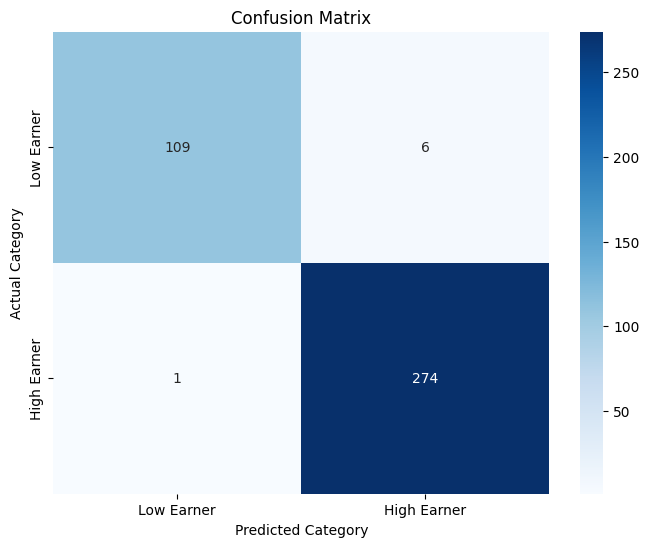

In [55]:
# Convert continuous predictions to binary labels based on the threshold:
y_pred_class = (y_pred > 3000).astype(int)  # Predictions for High_Earner

# Generate the confusion matrix for the classification task:
cm = confusion_matrix(y_test_class, y_pred_class)  # Use y_test_class, y_pred_class

print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
# Ensure 'labels' is defined. Assuming binary classification:
labels = ['Low Earner', 'High Earner']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix')
plt.show()

**Evaluate (Classification Metrics)**

In [56]:
categorical_features = ['Job_Category', 'Platform', 'Client_Region', 'Payment_Method']  # Include all categorical features
X_classification = pd.get_dummies(X_classification, columns=categorical_features, drop_first=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

**Unsupervised Learning (Example using clustering)**

In [66]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train) #using X_train as an example.

silhouette_avg = silhouette_score(X_train, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46361374836741515



Cluster Centers (Scaled Data):
[[ 1.17737574e-02  3.54756724e-02 -2.01610022e-02  5.38068677e-01
   2.09537325e-02  8.48433186e-04  2.92716715e-04  7.25989319e-03
  -6.50489651e-03 -1.94566928e-02  1.02768199e-02  1.42999291e-01
   6.58652814e-01  4.93341474e-02  7.65773765e-02 -3.72852104e-01
   5.19499558e-02  4.99107865e-02  2.38521720e-02  4.17845998e-02
  -1.30965700e-02 -4.07571299e-04 -9.74495118e-03  4.11253400e-04
  -1.59438512e-02  1.46645926e-02 -1.22609930e-02 -6.02578866e-03
   2.20161778e-02 -2.71646032e-03  2.91120029e-02 -3.49757096e-02
   2.56360098e-03]
 [-1.02012245e-01 -8.74296932e-03  8.42430080e-03  2.17056640e-02
  -8.28025962e-02  8.72170443e-02  3.26722042e-02  3.94551136e-02
  -4.77863531e-02  5.71343090e-02  4.35035121e-02 -1.32657819e-01
   1.00706993e-01 -3.66579396e-01 -3.78185958e-01  2.68202858e+00
  -3.66579396e-01 -3.96572855e-01 -3.71959360e-01 -3.88743625e-01
   3.04560560e-02  4.67285632e-02  1.87104712e-02 -5.37774299e-02
   4.23738294e-02  7.5617

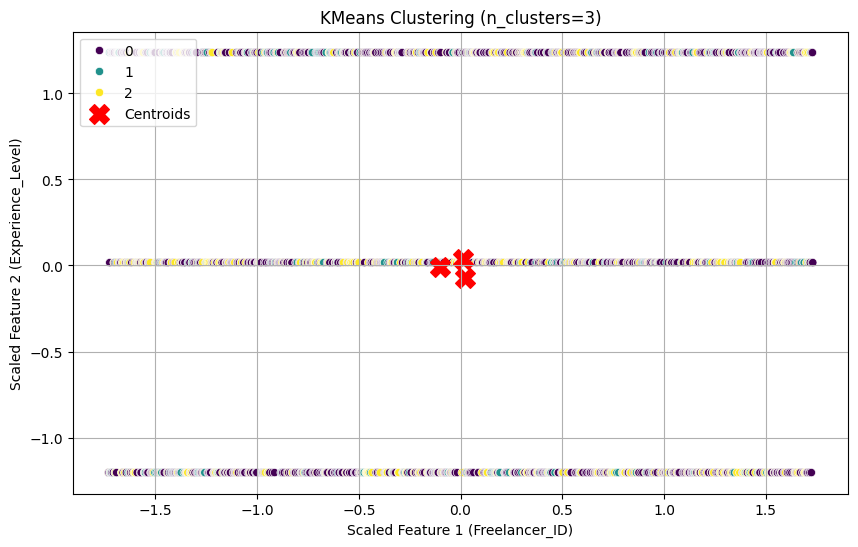


Silhouette Score: 0.06
Inertia: 59198.30


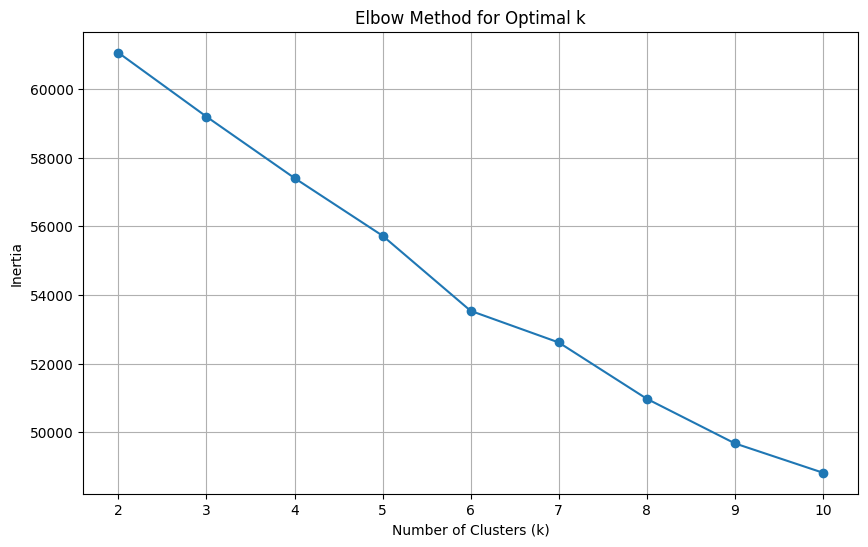

In [80]:
X = df_encoded.copy()

# Scale the data (important for distance-based algorithms like KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

# Get the cluster centers (in the scaled space)
cluster_centers = kmeans.cluster_centers_

print(f"\nCluster Centers (Scaled Data):\n{cluster_centers}")
print(f"\nCluster Assignments:\n{df['Cluster'].value_counts()}")

if X_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, color='red', label='Centroids')
    plt.title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.xlabel(f'Scaled Feature 1 ({X.columns[0]})')
    plt.ylabel(f'Scaled Feature 2 ({X.columns[1]})')
    plt.legend()
    plt.grid(True)
    plt.show()
elif X_scaled.shape[1] == 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis')
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', s=200, color='red', label='Centroids')
    ax.set_xlabel(f'Scaled Feature 1 ({X.columns[0]})')
    ax.set_ylabel(f'Scaled Feature 2 ({X.columns[1]})')
    ax.set_zlabel(f'Scaled Feature 3 ({X.columns[2]})')
    ax.set_title(f'KMeans Clustering (n_clusters={n_clusters})')
    ax.legend()
    plt.show()
else:
    print("\nData has more than 3 dimensions, cannot easily visualize clusters in a 2D or 3D plot.")

# For KMeans, common evaluation metrics include the Silhouette Score and Inertia
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")

# Inertia (within-cluster sum of squares)
print(f"Inertia: {kmeans.inertia_:.2f}")

# Determining the optimal number of clusters (Elbow Method)
if X_scaled.shape[0] > n_clusters: # Avoid errors with too few samples
    inertia = []
    range_n_clusters = range(2, 11)
    for i in range_n_clusters:
        kmeans_elbow = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans_elbow.fit(X_scaled)
        inertia.append(kmeans_elbow.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
else:
    print("\nNot enough data points to perform the Elbow Method effectively.")